In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as sklinear
import sklearn.ensemble as skensemble
import sklearn.svm as sksvm
import sklearn.model_selection as skselect
import sklearn.metrics as skmetrics
import numpy as np

In [21]:
fileName = "compas-scores-two-years.csv"

In [22]:
df = pd.read_csv(fileName)
print("Data in file: ", fileName)
df.head()

Data in file:  compas-scores-two-years.csv


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


**Cleaning the data**

In [23]:
df = df.dropna(subset=["days_b_screening_arrest"])

df = df[
    (df.days_b_screening_arrest <= 30) &
    (df.days_b_screening_arrest >= -30) &
    (df.is_recid != -1) &
    (df.c_charge_degree != "O") &
    (df.score_text != "N/A")
]

df.reset_index(inplace=True, drop=True)

print("Shape of Data after cleaning: ", df.shape)

Shape of Data after cleaning:  (6172, 53)


<AxesSubplot: title={'center': 'Count of each decile score'}>

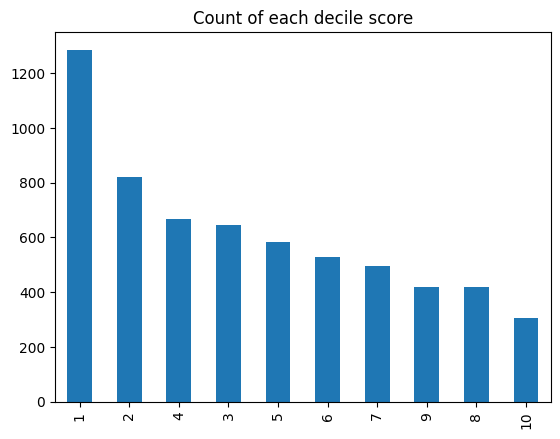

In [26]:
countValues = dataframe.decile_score.value_counts()
#plot the count of each decile score
countValues.plot(kind='bar', title='Count of each decile score')

array([[<AxesSubplot: title={'center': 'African-American'}>,
        <AxesSubplot: title={'center': 'Asian'}>],
       [<AxesSubplot: title={'center': 'Caucasian'}>,
        <AxesSubplot: title={'center': 'Hispanic'}>],
       [<AxesSubplot: title={'center': 'Native American'}>,
        <AxesSubplot: title={'center': 'Other'}>]], dtype=object)

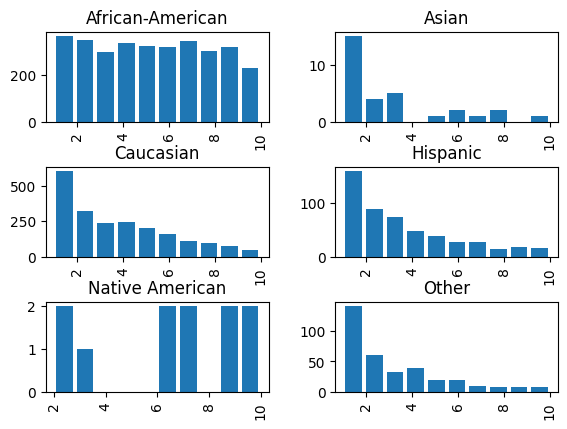

In [31]:
df.decile_score.hist(by=df.race, rwidth=0.8)

array([<AxesSubplot: title={'center': 'Female'}>,
       <AxesSubplot: title={'center': 'Male'}>], dtype=object)

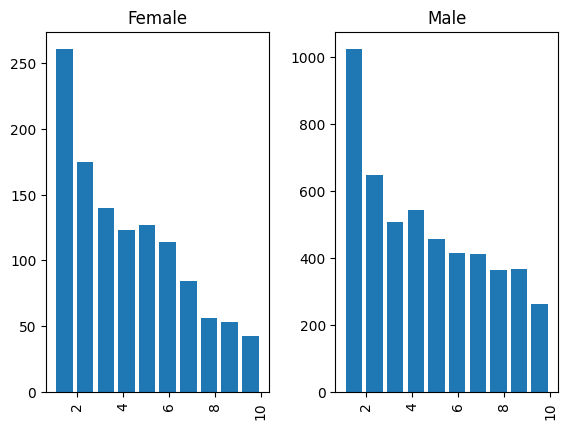

In [32]:
df.decile_score.hist(by=df.sex, rwidth=0.8)

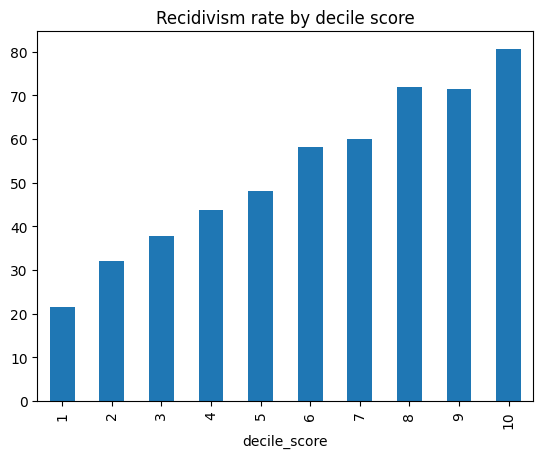

In [36]:
ax = (df.two_year_recid.groupby(df.decile_score).mean() * 100).plot(kind='bar', title='Recidivism rate by decile score')


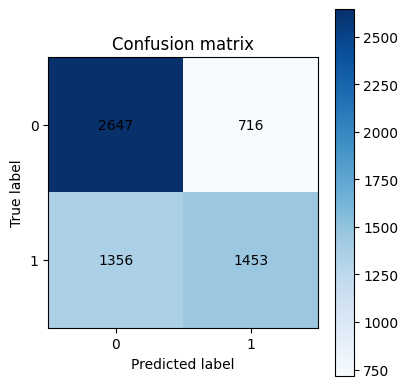

In [51]:
# taking score above 5 as high risk and below 5 as low risk
df['high_risk'] = df['decile_score'].apply(lambda x: 1 if x > 5 else 0)
#displaying confusion matrix  
matrix = skmetrics.confusion_matrix(df['two_year_recid'], df['high_risk'])

#plotting confusion matrix 
plt.figure(figsize=(4, 4))
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
width, height = matrix.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(matrix[x][y]), xy=(y, x), 
                     horizontalalignment='center',
                     verticalalignment='center')
plt.show()




In [53]:
# display accuracy, precision, recall, f1 score
print("Accuracy: ", skmetrics.accuracy_score(df['two_year_recid'], df['high_risk']))
print("Precision: ", skmetrics.precision_score(df['two_year_recid'], df['high_risk']))
print("Recall: ", skmetrics.recall_score(df['two_year_recid'], df['high_risk']))
print("F1 Score: ", skmetrics.f1_score(df['two_year_recid'], df['high_risk']))

Accuracy:  0.6642903434867142
Precision:  0.6698939603503918
Recall:  0.5172659309362763
F1 Score:  0.5837685817597429


In [56]:
# display classification report
print(skmetrics.classification_report(df['two_year_recid'], df['high_risk']))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72      3363
           1       0.67      0.52      0.58      2809

    accuracy                           0.66      6172
   macro avg       0.67      0.65      0.65      6172
weighted avg       0.67      0.66      0.66      6172



In [59]:
# percentage of people who recidivated in two years group by race
df.groupby(df.race).two_year_recid.mean()

race
African-American    0.523150
Asian               0.258065
Caucasian           0.390870
Hispanic            0.371316
Native American     0.454545
Other               0.361516
Name: two_year_recid, dtype: float64

<AxesSubplot: title={'center': 'Recidivism'}, xlabel='race'>

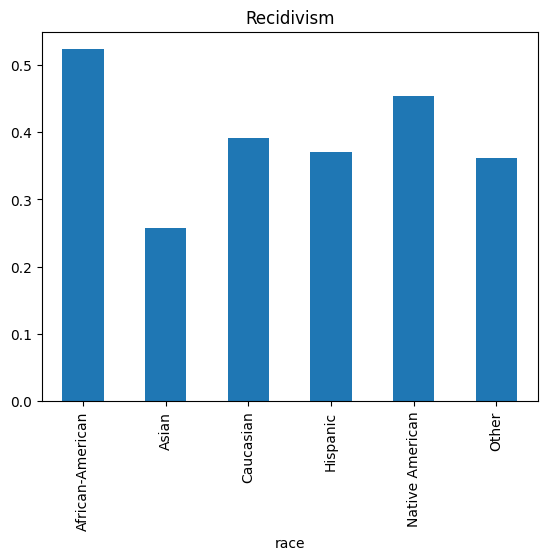

In [61]:
# plot percentage of people who recidivated in two years group by race
df.groupby(df.race).two_year_recid.mean().plot(kind='bar', title='Recidivism')

In [62]:
# percetage of people with high risk score group by race
df.groupby(df.race).high_risk.mean()

race
African-American    0.474331
Asian               0.193548
Caucasian           0.235854
Hispanic            0.200393
Native American     0.727273
Other               0.148688
Name: high_risk, dtype: float64

<AxesSubplot: title={'center': 'High Risk'}, xlabel='race'>

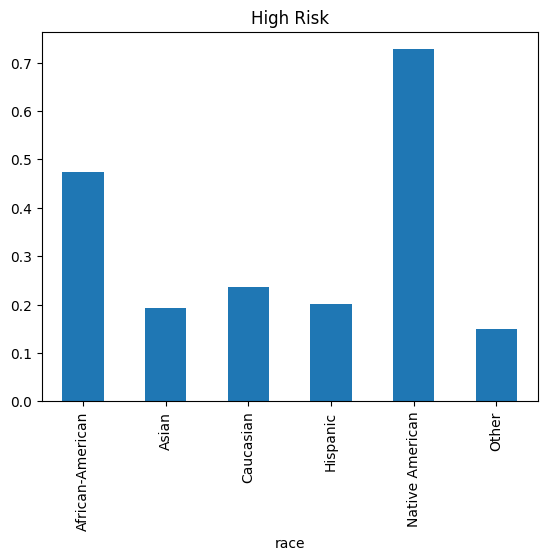

In [63]:
# plot percetage of people with high risk score group by
df.groupby(df.race).high_risk.mean().plot(kind='bar', title='High Risk')

In [67]:
df.groupby(df.race).count()['id']

race
African-American    3175
Asian                 31
Caucasian           2103
Hispanic             509
Native American       11
Other                343
Name: id, dtype: int64

Asian and native americans are less in number - ignoring it in analysis

In [70]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid', 'high_risk'],
      dtype='object')